# dermis DEG, known marker

In [1]:
import scanpy as sc, numpy as np, pandas as pd
import scvi

Global seed set to 0


In [2]:
import torch
print(torch.cuda.is_available())

True


In [3]:
from matplotlib.pyplot import rc_context
from matplotlib import pyplot as plt

In [5]:
adata = sc.read("/data/_90.User_Data/revolvefire/Jupyter//TWIST2_220616/221205_Final/230125.testingfurthersubcluster.dermis.subset.adata.REscVIintegrated.h5ad")

Only considering the two last: ['.REscVIintegrated', '.h5ad'].
Only considering the two last: ['.REscVIintegrated', '.h5ad'].


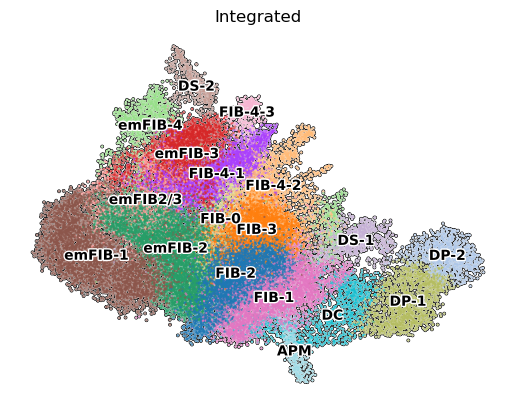

In [6]:
sc.pl.umap(
    adata,
    color=["sub_cluster3"],
    frameon=False, title="Integrated", add_outline=True, size=10, legend_loc='on data',legend_fontoutline=2
)

In [7]:
adata

AnnData object with n_obs × n_vars = 44416 × 5500
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'ident', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'bulk.ident', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI_0.2', 'leiden_scVI_0.3', 'leiden_scVI_0.4', 'leiden_scVI_0.5', 'leiden_scVI_0.6', 'leiden_scVI_0.7', 'leiden_scVI_0.8', 'leiden_scVI_0.9', 'leiden_scVI_1.0', 'leiden_scVI_1.5', 'sub_cluster', 'sub_cluster2', 'from_whole', '_scvi_raw_norm_scaling', 'sub_cluster3'
    var: 'scDblFinder.selected-0', 'scDblFinder.selected-1', 'scDblFinder.selected-10', 'scDblFinder.selected-2', 'scDblFinder.selected-3', 'scDblFinder.selected-4', 'scDblFinder.selected-5', 'scDblFinder.selected-6', 'scDblFinder.selected-7', 'scDblFinder.selected-8', 'scDblFinder.selected-9', 'mt', 'n_cells_by_counts', 'mean_counts'

In [8]:
adata.obs["sub_cluster3"] = (
    adata.obs["sub_cluster3"]
    .cat.reorder_categories(
        sorted(adata.obs["sub_cluster3"].cat.categories)
    )
)

In [9]:
new_cluster_names = [
    'APM', 'DC', 'DP-1', 'DP-2', 'DS-1', 'DS-2', 'FIB-0', 'FIB-1', 'FIB-2', 'FIB-3', 'FIB-4-1', "FIB-4-2", "FIB-4-3", "emFIB-1", "emFIB-2", "emFIB-3", "emFIB-4", "emFIB-2/3"]
adata.rename_categories('sub_cluster3', new_cluster_names)

/mnt/gmi-l1/_90.User_Data/revolvefire/anaconda3/envs/scvi-env-rollback/lib/python3.9/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


In [10]:
adata.obs["sub_cluster3"] = (
    adata.obs["sub_cluster3"]
    .cat.reorder_categories(
        sorted(adata.obs["sub_cluster3"].cat.categories)
    )
)

In [11]:
vae = scvi.model.SCVI.load("/data/_90.User_Data/revolvefire/Jupyter//TWIST2_220616/221205_Final/221212.dermis.subset.E13-PD4.model.hvg5500.seed11", adata=adata, use_gpu=True)

INFO     File /data/_90.User_Data/revolvefire/Jupyter//TWIST2_220616/221205_Final/221212.derm
         is.subset.E13-PD4.model.hvg5500.seed11/model.pt already downloaded                  


/mnt/gmi-l1/_90.User_Data/revolvefire/anaconda3/envs/scvi-env-rollback/lib/python3.9/site-packages/scvi/data/fields/_layer_field.py:90: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [12]:
de_df = vae.differential_expression(
    groupby="sub_cluster3",
)
de_df.head()

DE...: 100%|██████████| 18/18 [03:04<00:00, 10.26s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Ccdc88c,0.9994,0.0006,7.417964,0.000300,1.510146e-06,0.0,0.25,8.366102,8.430391,2.674063,...,0.858622,0.004038,0.478571,0.004978,3.186281,0.013654,True,APM vs Rest,APM,Rest
Myocd,0.9988,0.0012,6.724225,0.000545,4.323439e-06,0.0,0.25,9.082664,9.240422,2.743109,...,1.199751,0.011328,0.614286,0.009274,4.567417,0.042347,True,APM vs Rest,APM,Rest
Gm34829,0.9988,0.0012,6.724225,0.000004,6.580440e-08,0.0,0.25,6.839794,6.988644,2.262890,...,0.013131,0.000154,0.014286,0.000136,0.036925,0.000583,True,APM vs Rest,APM,Rest
Slitrk3,0.9986,0.0014,6.569875,0.000210,2.677340e-06,0.0,0.25,8.628511,8.828979,2.730770,...,0.598801,0.011528,0.342857,0.008887,2.218295,0.030122,True,APM vs Rest,APM,Rest
Pcp4l1,0.9982,0.0018,6.318161,0.000291,3.243541e-06,0.0,0.25,8.023785,8.022816,3.061647,...,0.726397,0.007781,0.321429,0.006410,2.709768,0.032040,True,APM vs Rest,APM,Rest


In [13]:
#de_df.to_csv("230208.scvi_de_df_dermal_reintegrated.csv")

In [14]:
markers = {}
cats = adata.obs["sub_cluster3"].cat.categories
for i, c in enumerate(cats):
    cid = "{} vs Rest".format(c)
    cell_type_df = de_df.loc[de_df.comparison == cid]

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 3]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]

    markers[c] = cell_type_df.index.tolist()[:3]

In [15]:
markers10 = {}
cats = adata.obs["sub_cluster3"].cat.categories
for i, c in enumerate(cats):
    cid = "{} vs Rest".format(c)
    cell_type_df = de_df.loc[de_df.comparison == cid]

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 3]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]

    markers10[c] = cell_type_df.index.tolist()[:10]

In [16]:
markers

{'APM': ['Ccdc88c', 'Myocd', 'Slitrk3'],
 'DC': ['Hes5', 'Prdm1', 'Dll1'],
 'DP-1': ['Dll1', 'Adamts20', 'Flt1'],
 'DP-2': ['F5', 'Snap91', 'Spef2'],
 'DS-1': ['Amhr2', 'Btla', 'Pawr'],
 'DS-2': ['Mecom', 'Mecomos', 'Dlx6'],
 'FIB-0': ['Pax3', 'Aldh3a1', 'Foxl2'],
 'FIB-1': ['Cxcr4', '2600014E21Rik', 'Sox18'],
 'FIB-2': ['Pde6h', 'Gm32647', 'Dpp4'],
 'FIB-3': ['Ly6a', 'Clec3b', 'Ltbp2'],
 'FIB-4-1': ['Kcnj8', 'Sfrp4', 'Ptgis'],
 'FIB-4-2': ['Aoc3', 'Ifi204', 'Ly6a'],
 'FIB-4-3': ['Car8', 'Pi16', 'Ildr2'],
 'emFIB-1': ['Rad51ap1', 'Aunip', 'Clspn'],
 'emFIB-2': ['Crabp1', 'Sp5', '2610318N02Rik'],
 'emFIB-2/3': ['Rbm15', 'Pfas', 'Hbb-bs'],
 'emFIB-3': ['Gata6', '2610016A17Rik', 'Wnt2'],
 'emFIB-4': ['Scx', 'Mkx', 'Col2a1']}

In [17]:
markers10

{'APM': ['Ccdc88c',
  'Myocd',
  'Slitrk3',
  'Pcp4l1',
  'Lmod1',
  'Actg2',
  'Fam189a2',
  '9130024F11Rik',
  'Fat3',
  'Bche'],
 'DC': ['Hes5',
  'Prdm1',
  'Dll1',
  'Galnt9',
  'Cpne5',
  'Tfap2c',
  'Gm11541',
  'Heyl',
  'Sox2',
  'Sox18'],
 'DP-1': ['Dll1',
  'Adamts20',
  'Flt1',
  'Prokr2',
  'Alpl',
  'Phactr3',
  'Hes5',
  'Tfap2c',
  'Sox2ot',
  'Draxin'],
 'DP-2': ['F5',
  'Snap91',
  'Spef2',
  'Mc5r',
  'Aard',
  'Nrg2',
  'Gldn',
  'Rspo2',
  'Msx2',
  'Bambi'],
 'DS-1': ['Amhr2',
  'Btla',
  'Pawr',
  '2210011C24Rik',
  'Fgl2',
  'Actg2',
  'Cd200',
  'Acan',
  'Casq2',
  'Arap2'],
 'DS-2': ['Mecom',
  'Mecomos',
  'Dlx6',
  'Dlx1',
  'Wfdc18',
  'Sox5',
  'Bmp5',
  'Mia',
  'Gm26903',
  'Pthlh'],
 'FIB-0': ['Pax3',
  'Aldh3a1',
  'Foxl2',
  'Phex',
  'Mab21l2',
  'Eya1',
  'Nr2f1',
  'Gsc',
  'Iqgap2',
  'Tnn'],
 'FIB-1': ['Cxcr4',
  '2600014E21Rik',
  'Sox18',
  'Stfa3',
  'Entpd2',
  'Sost',
  'Mafb',
  'Ltbp2',
  'Foxd1',
  'Lamc3'],
 'FIB-2': ['Pde6h',
  'Gm3264

## stacked violin

In [18]:
#adata=sc.read("230125.testingfurthersubcluster.dermis.subset.adata.REscVIintegrated.h5ad")

In [19]:
adata

AnnData object with n_obs × n_vars = 44416 × 5500
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'ident', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'bulk.ident', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI_0.2', 'leiden_scVI_0.3', 'leiden_scVI_0.4', 'leiden_scVI_0.5', 'leiden_scVI_0.6', 'leiden_scVI_0.7', 'leiden_scVI_0.8', 'leiden_scVI_0.9', 'leiden_scVI_1.0', 'leiden_scVI_1.5', 'sub_cluster', 'sub_cluster2', 'from_whole', '_scvi_raw_norm_scaling', 'sub_cluster3'
    var: 'scDblFinder.selected-0', 'scDblFinder.selected-1', 'scDblFinder.selected-10', 'scDblFinder.selected-2', 'scDblFinder.selected-3', 'scDblFinder.selected-4', 'scDblFinder.selected-5', 'scDblFinder.selected-6', 'scDblFinder.selected-7', 'scDblFinder.selected-8', 'scDblFinder.selected-9', 'mt', 'n_cells_by_counts', 'mean_counts'

In [20]:
marker_genes_dict = {'Upper embryonic fibroblast':["Twist2", "Crabp1"], "Lower embryonic fibroblast":["Dlk1"], "Papillary fibroblast":["Entpd1", "Dpp4"],
                     "Reticular fibroblast":["Dlk1", "Ly6a"], "Hypodermal fibroblast":["Cxcl12", "Gpx3"], "Fascia fibroblast":["Mfap5", "Clec3b"], 'Dermal condensate/Newborn dermal papilla':["Sox18", "Bmp4", "Cxcr4", "Sdc1"],
                     'Dermal papilla':["Corin", "Alpl", "Vcan", "Alx4"], 'Dermal sheath':["Cd200", "Col11a1","Acan","Abi3bp"], 'Arrector pili muscle':["Actg2", "Itga8"]}

In [21]:
adata.obs['sub_cluster3']

AAACCTGAGCCAGTAG-1-0       emFIB-1
AAACCTGAGCTATGCT-1-0       emFIB-1
AAACCTGAGGAGTCTG-1-0       emFIB-4
AAACCTGAGTAGCCGA-1-0     emFIB-2/3
AAACCTGCACCCAGTG-1-0       emFIB-1
                           ...    
TTTGGTTCAACACAGG-1-10        FIB-2
TTTGTTGCAACTGCCG-1-10        FIB-1
TTTGTTGCACTACTTT-1-10         DP-2
TTTGTTGGTATCATGC-1-10         DP-2
TTTGTTGTCAAAGGAT-1-10         DS-2
Name: sub_cluster3, Length: 44416, dtype: category
Categories (18, object): ['APM', 'DC', 'DP-1', 'DP-2', ..., 'emFIB-2', 'emFIB-2/3', 'emFIB-3', 'emFIB-4']

In [22]:
#https://scanpy.discourse.group/t/how-to-order-legend-in-sc-pl-umap/411
adata.obs['sub_cluster3'].cat.reorder_categories(['emFIB-1', 'emFIB-2', 'emFIB-2/3', 'emFIB-3', 'emFIB-4', 'FIB-0', 'FIB-1', 'FIB-2', 'FIB-3', 'FIB-4-1', 'FIB-4-2', 'FIB-4-3', 'DC', 'DP-1', 'DP-2', 'DS-1', 'DS-2', 'APM'], inplace=True)

/tmp/ipykernel_39924/1743664723.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['sub_cluster3'].cat.reorder_categories(['emFIB-1', 'emFIB-2', 'emFIB-2/3', 'emFIB-3', 'emFIB-4', 'FIB-0', 'FIB-1', 'FIB-2', 'FIB-3', 'FIB-4-1', 'FIB-4-2', 'FIB-4-3', 'DC', 'DP-1', 'DP-2', 'DS-1', 'DS-2', 'APM'], inplace=True)


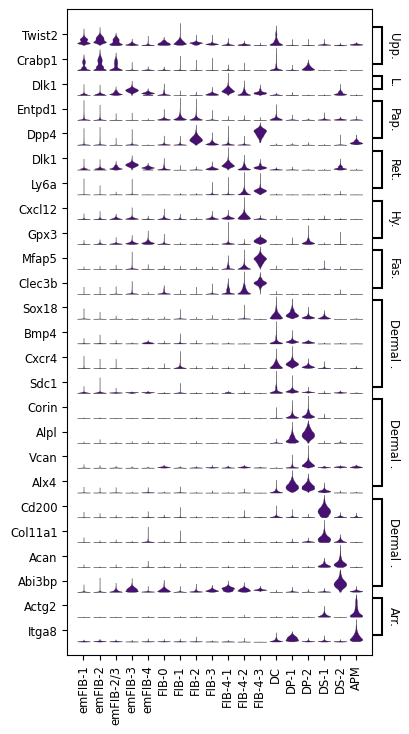

In [23]:
ax = sc.pl.stacked_violin(adata, marker_genes_dict, layer='scvi_normalized',
                          figsize=(6,8), row_palette='indigo', var_group_rotation=False,
                     swap_axes=True, dpi=1000,
                          groupby='sub_cluster3', save=("230212.stackedviolin.dermis.integrated.pdf"))